In [1]:
import numpy as np
from board import Board, get_neighbors, random_board, NEIGHBOR_KERNEL
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.ndimage import convolve


In [2]:
from numba import njit

In [7]:
def regenerate_apples(board: Board):
    """
    Stochastically respawn apples based on number of neighbors:

    prob | n_neighbors
    ------------------
    0    | L = 0
    0.01 | L = 1 or 2
    0.05 | L = 3 or 4
    0.1  | L > 4

    Could probably be faster...
    """
    # TODO: I still think this should be a function.
    #  Also we need to profile it, it will be slow on large boards (easier to do with a function)
    prob_table = defaultdict(lambda: 0.1)
    prob_table[0] = 0.0
    prob_table[1] = 0.01
    prob_table[2] = 0.01
    prob_table[3] = 0.05
    prob_table[4] = 0.05

    prob_map = np.zeros(board.shape)
    for row in range(board.shape[0]):
        for col in range(board.shape[1]):
            pos = (row, col)
            neighboring_pos = get_neighbors(pos, board.shape, radius=2)
            neighboring_apples = sum([board[r][c] for (r, c) in neighboring_pos])
            prob_map[row][col] = prob_table[neighboring_apples]

    rand = np.random.rand(*prob_map.shape)
    regen_map = rand < prob_map
    updated_board = np.clip(board + regen_map, 0, 1)
    return updated_board

In [8]:
board = random_board((20, 40))

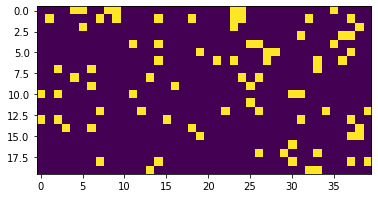

In [9]:
plt.imshow(board)

In [10]:
%%timeit
regenerate_apples(board)

89.4 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
from numba import vectorize

In [13]:
@vectorize
def regrow_prob(n: int) -> float:
    if n == 0:
        return 0.0
    elif n == 1 or n == 2:
        return 0.01
    elif n == 3 or n == 4:
        return 0.05
    else:
        return 0.1

def regenerate_apples(board):
    kernel = NEIGHBOR_KERNEL
    neighbor_map: np.ndarray = convolve(board, kernel, mode='constant')  # TODO: make sure this is ints
    prob_map = regrow_prob(neighbor_map)

    rand = np.random.rand(*neighbor_map.shape)
    regen_map = rand < prob_map
    updated_board = np.clip(board + regen_map, 0, 1)


    return updated_board

In [56]:
%%timeit
regenerate_apples(board)

63.4 µs ± 4.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [2]:
import numpy as np

In [9]:
board = np.random.rand(100, 100, 3)

In [10]:
%%timeit
np.rot90(board)

8.24 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
